In [1]:
%display latex

In [3]:
var("x")
expr=(1./sqrt(2*pi))*exp(-x*x/2.)
integrate(expr,(x,-oo,1)) - integrate(expr,(x,-oo,-1))

0.25*sqrt(2)*(sqrt(2)*sqrt(pi)*erf(1/2*sqrt(2)) + sqrt(2)*sqrt(pi))/sqrt(pi) + 0.25*sqrt(2)*(sqrt(2)*sqrt(pi)*erf(1/2*sqrt(2)) - sqrt(2)*sqrt(pi))/sqrt(pi)

In [4]:
n(integrate(expr,(x,-oo,2)) - integrate(expr,(x,-oo,-2)))

0.954499736103642

In [5]:
n(integrate(expr,(x,-oo,1)) - integrate(expr,(x,-oo,-1)))

0.682689492137086

Moyenne de l'échantillon :  4.160398
Ecart type de l'échantillon :  0.00776772785311
Minimum :  4.144  Maximum :  4.183


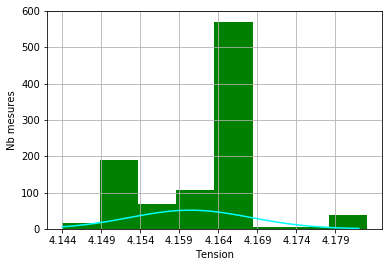

In [14]:
# -*- coding: utf-8 -*-

# programme de calcul d'une distribution de mesures
# Dominique Lefebvre
# TangenteX.com
# 5 octobre 2016

# importation des librairies
import csv
from scipy import sqrt, pi, exp, mean, std, arange
import matplotlib.pyplot as plt


# Fonction de chargement des mesures contenues dans le fichier csv
# dans une liste (ouverture du fichier en mode universal-newline)
def ChargementListe(NomFic):
    liste = []
    Fic1 = open(NomFic,'rU')
    Fic1CSV = csv.reader(Fic1, delimiter = ';')
    for row in Fic1CSV:
        if row :
          mesure = float(row[1])
          liste.append(mesure)
    Fic1.close()
    return liste


# Définition des fonctions statistiques
def Gaussienne(x,moyenne,ecarttype):
    return 1/(ecarttype*sqrt(2*pi))*exp(-(x-moyenne)**2/(2*ecarttype**2))
    

# Définition des paramètres
NomFichier = 'MESURES1.CSV'

# ------------------------------------------------------------------------
# Début du programme
# ------------------------------------------------------------------------

# Chargement du fichier de mesures dans une liste
ListeMesures = ChargementListe(NomFichier)
NbMesures = len(ListeMesures)
MinListe = min(ListeMesures)
MaxListe = max(ListeMesures)

# Affichage des paramètres statistiques
print "Moyenne de l'échantillon : ",mean(ListeMesures)
print "Ecart type de l'échantillon : ",std(ListeMesures)
print "Minimum : ",MinListe, " Maximum : ", MaxListe

# Définition des classes de l'histogramme
NbClasses = 8
ClasseRange  = 0.005

# Affichage de l'histogramme
fig = plt.figure()
plt.hist(ListeMesures, NbClasses, facecolor='green')

# Tracé de la gaussienne théorique avec les paramètres de la distribution
x = arange(MinListe,MaxListe,0.001)
y = Gaussienne(x,mean(ListeMesures),std(ListeMesures))
plt.plot(x,y,'cyan')

# Affichage de l'histogramme de distribution des mesures
plt.xlabel('Tension')
plt.ylabel(u'Nb mesures') # string en unicode
plt.xticks(arange(MinListe, MaxListe, ClasseRange))
plt.grid(True)

plt.show()

Expression du résultat :  3.99211251719  +-  0.00200320772893


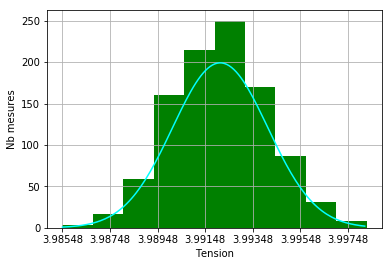

In [13]:
from scipy import sqrt, pi, exp, mean, std, arange, random
import matplotlib.pyplot as plt


# Définition des fonctions statistiques
def Gaussienne(x,moyenne,ecarttype):
    return 1/(ecarttype*sqrt(2*pi))*exp(-(x-moyenne)**2/(2*ecarttype**2))
    
def Ecart_Type(liste):
    n = len(liste)
    ecart = 0
    mu = mean(liste)
    for i in range(n):
        ecart = ecart + (liste[i] - mu)**2
    ecart = sqrt(ecart/(n-1))
    return ecart
    

# Définition des paramètres
NomFichier = 'MESURES1.CSV'

# ------------------------------------------------------------------------
# Début du programme
# ------------------------------------------------------------------------
   
# Création d'une liste de mesures avec des erreurs aléatoires
# contruite autour de la valeur de référence de la tension
U = 3.992           # tension de référence
NbMesures = 1000
ListeMesures = []
for i in range(NbMesures):
    ListeMesures.append(random.normal(U,0.002))


# Calcul des paramètres de la liste
NbMesures = len(ListeMesures)
MinListe = min(ListeMesures)
MaxListe = max(ListeMesures)
Moyenne = mean(ListeMesures)
EcartType = std(ListeMesures) 

# Affichage des paramètres statistiques
print "Expression du résultat : ", Moyenne, " +- ", EcartType



# Définition des classes de l'histogramme
NbClasses = 10
ClasseRange  = 0.002

# Affichage de l'histogramme
fig = plt.figure()
plt.hist(ListeMesures, NbClasses, facecolor='green')

# Tracé de la gaussienne théorique avec les paramètres de la distribution
x = arange(MinListe,MaxListe,0.0001)
y = Gaussienne(x,Moyenne,EcartType)
plt.plot(x,y,'cyan')

# Affichage de l'histogramme de distribution des mesures
plt.xlabel('Tension')
plt.ylabel(u'Nb mesures') # string en unicode
plt.xticks(arange(MinListe, MaxListe, ClasseRange))
plt.grid(True)

plt.show()

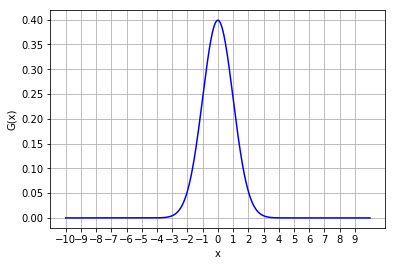

In [9]:
# -*- coding: utf-8 -*-

# programme de tracé d'une courbe gaussienne
# Dominique Lefebvre
# TangenteX.com
# 8 octobre 2016

# importation des librairies
from scipy import arange
import matplotlib.pyplot as plt
import scipy.stats as stats

# tracé de la loi normale centrée réduite
mu = 0
sigma = 1
x = arange(-10.0,10.0,0.0001)
y = stats.norm.pdf(x,mu,sigma)

# Affichage de l'histogramme
fig = plt.figure()
plt.plot(x,y,'blue')
plt.xlabel('x')
plt.ylabel('G(x)')
plt.xticks(arange(-10.0,10.0,1.))
plt.grid(True)

plt.show()

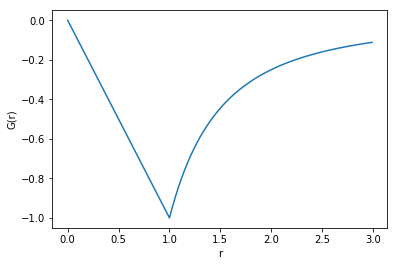

In [10]:
from pylab import *
# constantes
R = 1
# definition de la fonction de calcul de G(r)
def G(r):
    if r < R:
      return -(1/R**3)*r
    else:
      return -1/(r**2)
# initialisation
r0 = 0.0
rmax = 3*R
pas_r = 0.01
r = arange(r0, rmax, pas_r)
NormeG = zeros(len(r))
# calcul de la valeur de G(r)
for i in xrange(len(r)):
    NormeG[i] = G(r[i])
# affichage de la norme du champ en fonction de r
figure()
plot(r, NormeG)
xlabel('r')
ylabel('G(r)')
show()